# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url = api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units=imperial
base_url = 'http://api.openweathermap.org/data/2.5/weather?&appid='+weather_api_key+'&units=imperial&q=' 

# use variable to track count of cities 
cityCount = 1

# use variables to store values from api
lat_list = []
lon_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []
country_list = []
date_list = []
city_list = []


print(f'Begin Data Retrevial')
print(f'------------------')

# for each city in the list attempt to get weather data
for city in cities:
    
    # attempt to get response data from open weather map api
    try:
        
        print(f'Processing Record {cityCount} | {city}')
        cityCount += 1
        url = base_url+city
        response = requests.get(url).json()

        lat = response['coord']['lat']
        lon = response['coord']['lon']
        temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        #store data
        lat_list.append(lat)
        lon_list.append(lon)
        temp_list.append(temp)
        humidity_list.append(humidity)
        clouds_list.append(clouds)
        wind_list.append(wind)
        country_list.append(country)
        date_list.append(date)
        city_list.append(city)
    
    # skip city if response fails
    except:
        print(f'{city} not found. Skipping...')
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begin Data Retrevial
------------------
Processing Record 1 | ambilobe
Processing Record 2 | tiksi
Processing Record 3 | myre
Processing Record 4 | avera
Processing Record 5 | sarankhola
Processing Record 6 | cabo san lucas
Processing Record 7 | barentsburg
barentsburg not found. Skipping...
Processing Record 8 | kotli loharan
Processing Record 9 | mar del plata
Processing Record 10 | avarua
Processing Record 11 | taicheng
Processing Record 12 | enshi
Processing Record 13 | ribeira grande
Processing Record 14 | olga
Processing Record 15 | half moon bay
Processing Record 16 | byron bay
Processing Record 17 | vaini
Processing Record 18 | attawapiskat
attawapiskat not found. Skipping...
Processing Record 19 | alofi
Processing Record 20 | busselton
Processing Record 21 | ushuaia
Processing Record 22 | broken hill
Processing Record 23 | lavrentiya
Processing Record 24 | cape town
Processing Record 25 | butaritari
Processing Record 26 | nikolskoye
Processing Record 27 | hobart
Processing Rec

Processing Record 232 | mitsamiouli
Processing Record 233 | xuchang
Processing Record 234 | zeerust
Processing Record 235 | provideniya
Processing Record 236 | pak phanang
Processing Record 237 | mitu
Processing Record 238 | mayumba
Processing Record 239 | victoria
Processing Record 240 | wajir
Processing Record 241 | marcona
marcona not found. Skipping...
Processing Record 242 | auki
Processing Record 243 | faanui
Processing Record 244 | tsihombe
tsihombe not found. Skipping...
Processing Record 245 | nuuk
Processing Record 246 | bethel
Processing Record 247 | mehamn
Processing Record 248 | odweyne
Processing Record 249 | hithadhoo
Processing Record 250 | sidney
Processing Record 251 | khani
Processing Record 252 | salalah
Processing Record 253 | ahumada
ahumada not found. Skipping...
Processing Record 254 | simplicio mendes
Processing Record 255 | fethiye
Processing Record 256 | kaitangata
Processing Record 257 | shadegan
Processing Record 258 | vagay
Processing Record 259 | vilyuysk

Processing Record 460 | quelimane
Processing Record 461 | bairiki
Processing Record 462 | berezovyy
Processing Record 463 | obo
Processing Record 464 | lumphat
Processing Record 465 | mogwase
Processing Record 466 | woodward
Processing Record 467 | sorvag
sorvag not found. Skipping...
Processing Record 468 | churapcha
Processing Record 469 | saint-joseph
Processing Record 470 | pangnirtung
Processing Record 471 | mbengwi
Processing Record 472 | mizdah
Processing Record 473 | leningradskiy
Processing Record 474 | balimo
balimo not found. Skipping...
Processing Record 475 | floro
Processing Record 476 | kourou
Processing Record 477 | trinidad
Processing Record 478 | abaete
Processing Record 479 | cuamba
Processing Record 480 | touros
Processing Record 481 | dubenskiy
dubenskiy not found. Skipping...
Processing Record 482 | moron
Processing Record 483 | badovinci
Processing Record 484 | lufilufi
Processing Record 485 | tazovskiy
Processing Record 486 | shuyskoye
Processing Record 487 | sa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({'City': city_list,
                        'Lat': lat_list,
                        'Lng': lon_list,
                        'Max Temp': temp_list,
                        'Humidity': humidity_list,
                        'Cloudiness': clouds_list,
                        'Wind Speed': wind_list,
                        'Country': country_list,
                        'Date': date_list
                       })

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambilobe,-13.20,49.05,86.67,39,18,7.85,MG,1604983865
1,tiksi,71.69,128.87,-11.96,88,30,6.06,RU,1604983870
2,myre,69.10,15.95,35.01,80,75,5.82,NO,1604984414
3,avera,33.19,-82.53,69.80,94,75,5.82,US,1604984416
4,sarankhola,22.31,89.79,83.10,59,0,6.93,BD,1604984417


In [5]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.973972,21.932447,57.763989,73.976950,47.132979,7.822979,1.604984e+09
std,32.847186,87.833277,22.986855,20.660527,38.087798,5.714838,1.801364e+02
min,-54.800000,-179.170000,-20.510000,7.000000,0.000000,0.470000,1.604984e+09
25%,-5.385000,-52.277500,42.782500,63.000000,3.000000,3.360000,1.604984e+09
50%,25.650000,26.240000,62.825000,80.000000,40.500000,6.545000,1.604984e+09
75%,48.367500,100.340000,75.930000,90.000000,88.000000,10.787500,1.604984e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,35.790000,1.604985e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
bad_data = city_df.loc[city_df['Humidity'] > 100].index

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(bad_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambilobe,-13.20,49.05,86.67,39,18,7.85,MG,1604983865
1,tiksi,71.69,128.87,-11.96,88,30,6.06,RU,1604983870
2,myre,69.10,15.95,35.01,80,75,5.82,NO,1604984414
3,avera,33.19,-82.53,69.80,94,75,5.82,US,1604984416
4,sarankhola,22.31,89.79,83.10,59,0,6.93,BD,1604984417


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

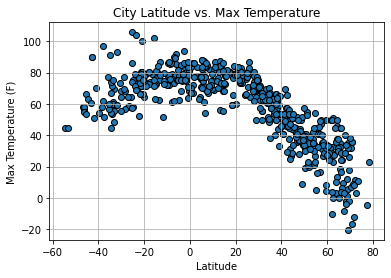

In [19]:
# latitude vs. temperature scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Max Temp'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/latVStemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

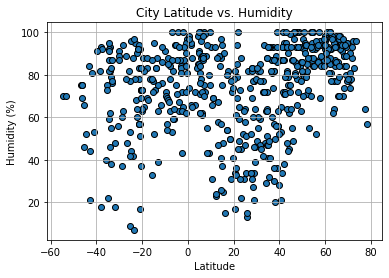

In [20]:
# latitude vs. humidity scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Humidity'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

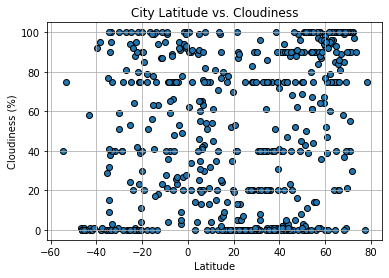

In [21]:
# latitude vs. cloudiness scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

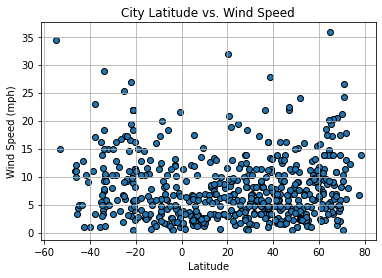

In [22]:
# latitude vs. wind speed scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_windSpeed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


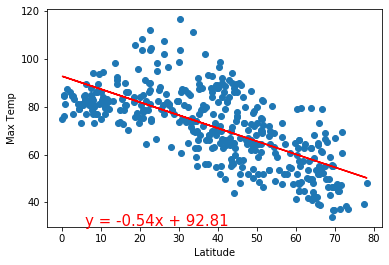

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


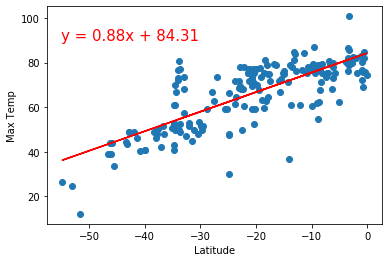

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


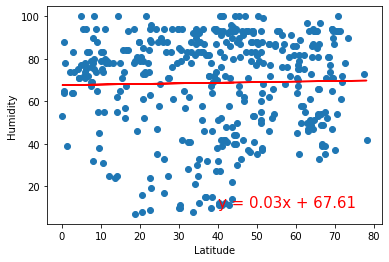

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


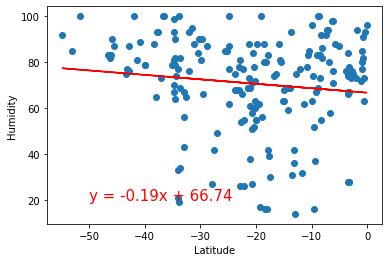

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


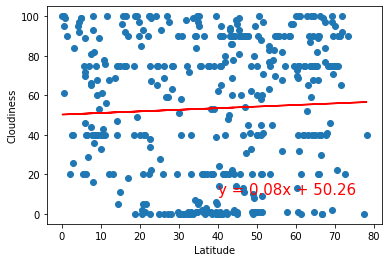

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


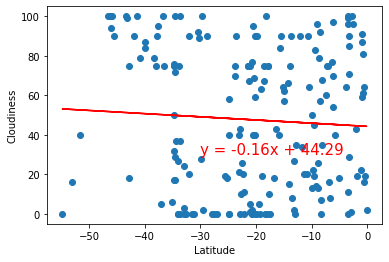

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


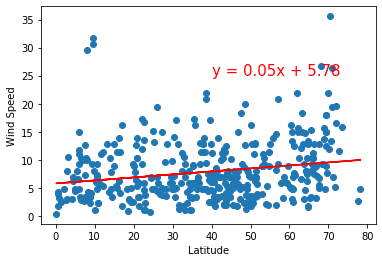

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


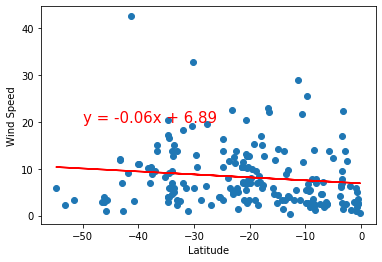